In [7]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.20


In [4]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [6]:
!pip install -q missingno

In [11]:
!pip install -q category_encoders

In [17]:
!pip install -q plotly

In [15]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [16]:
df = pd.read_csv("dataset/aug_train.csv") #Aqui esta sendo carredo o banco de dados

In [19]:
df.shape # aqui estamos visuliazando o shape, ele insica o numero de linhas e colunas

(19158, 14)

In [21]:
df.columns # Visulizando as colunas 

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [23]:
df.head() #permite que nos vizulizemos as 5 primeiras linhas do dataSet # Uma amostra 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### O Metodo INFO serve para Vizualizar os itpo de dodos

In [25]:
df.info() # Para Vizualizar os itpo de dodos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### Anlise Exploratoria de dados

In [29]:
#descrevendo dados numericos#
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [31]:
df.describe().drop(columns = ['enrollee_id','target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


-Em city_development_index (CDI), os valores médios são 0,828, mediana 0,903 e std 0,123. Isso significa que a maioria dos candidatos é de cidades bem desenvolvidas.

-Em training_hours, os valores médios são 65,367, mediana 47 e max 336. Isso significa que há mais candidatos com poucas horas de treinamento, mas alguns candidatos gastam muito tempo para fazer o treinamento.

### Visualizante as Variaveis Categoricas

In [33]:
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

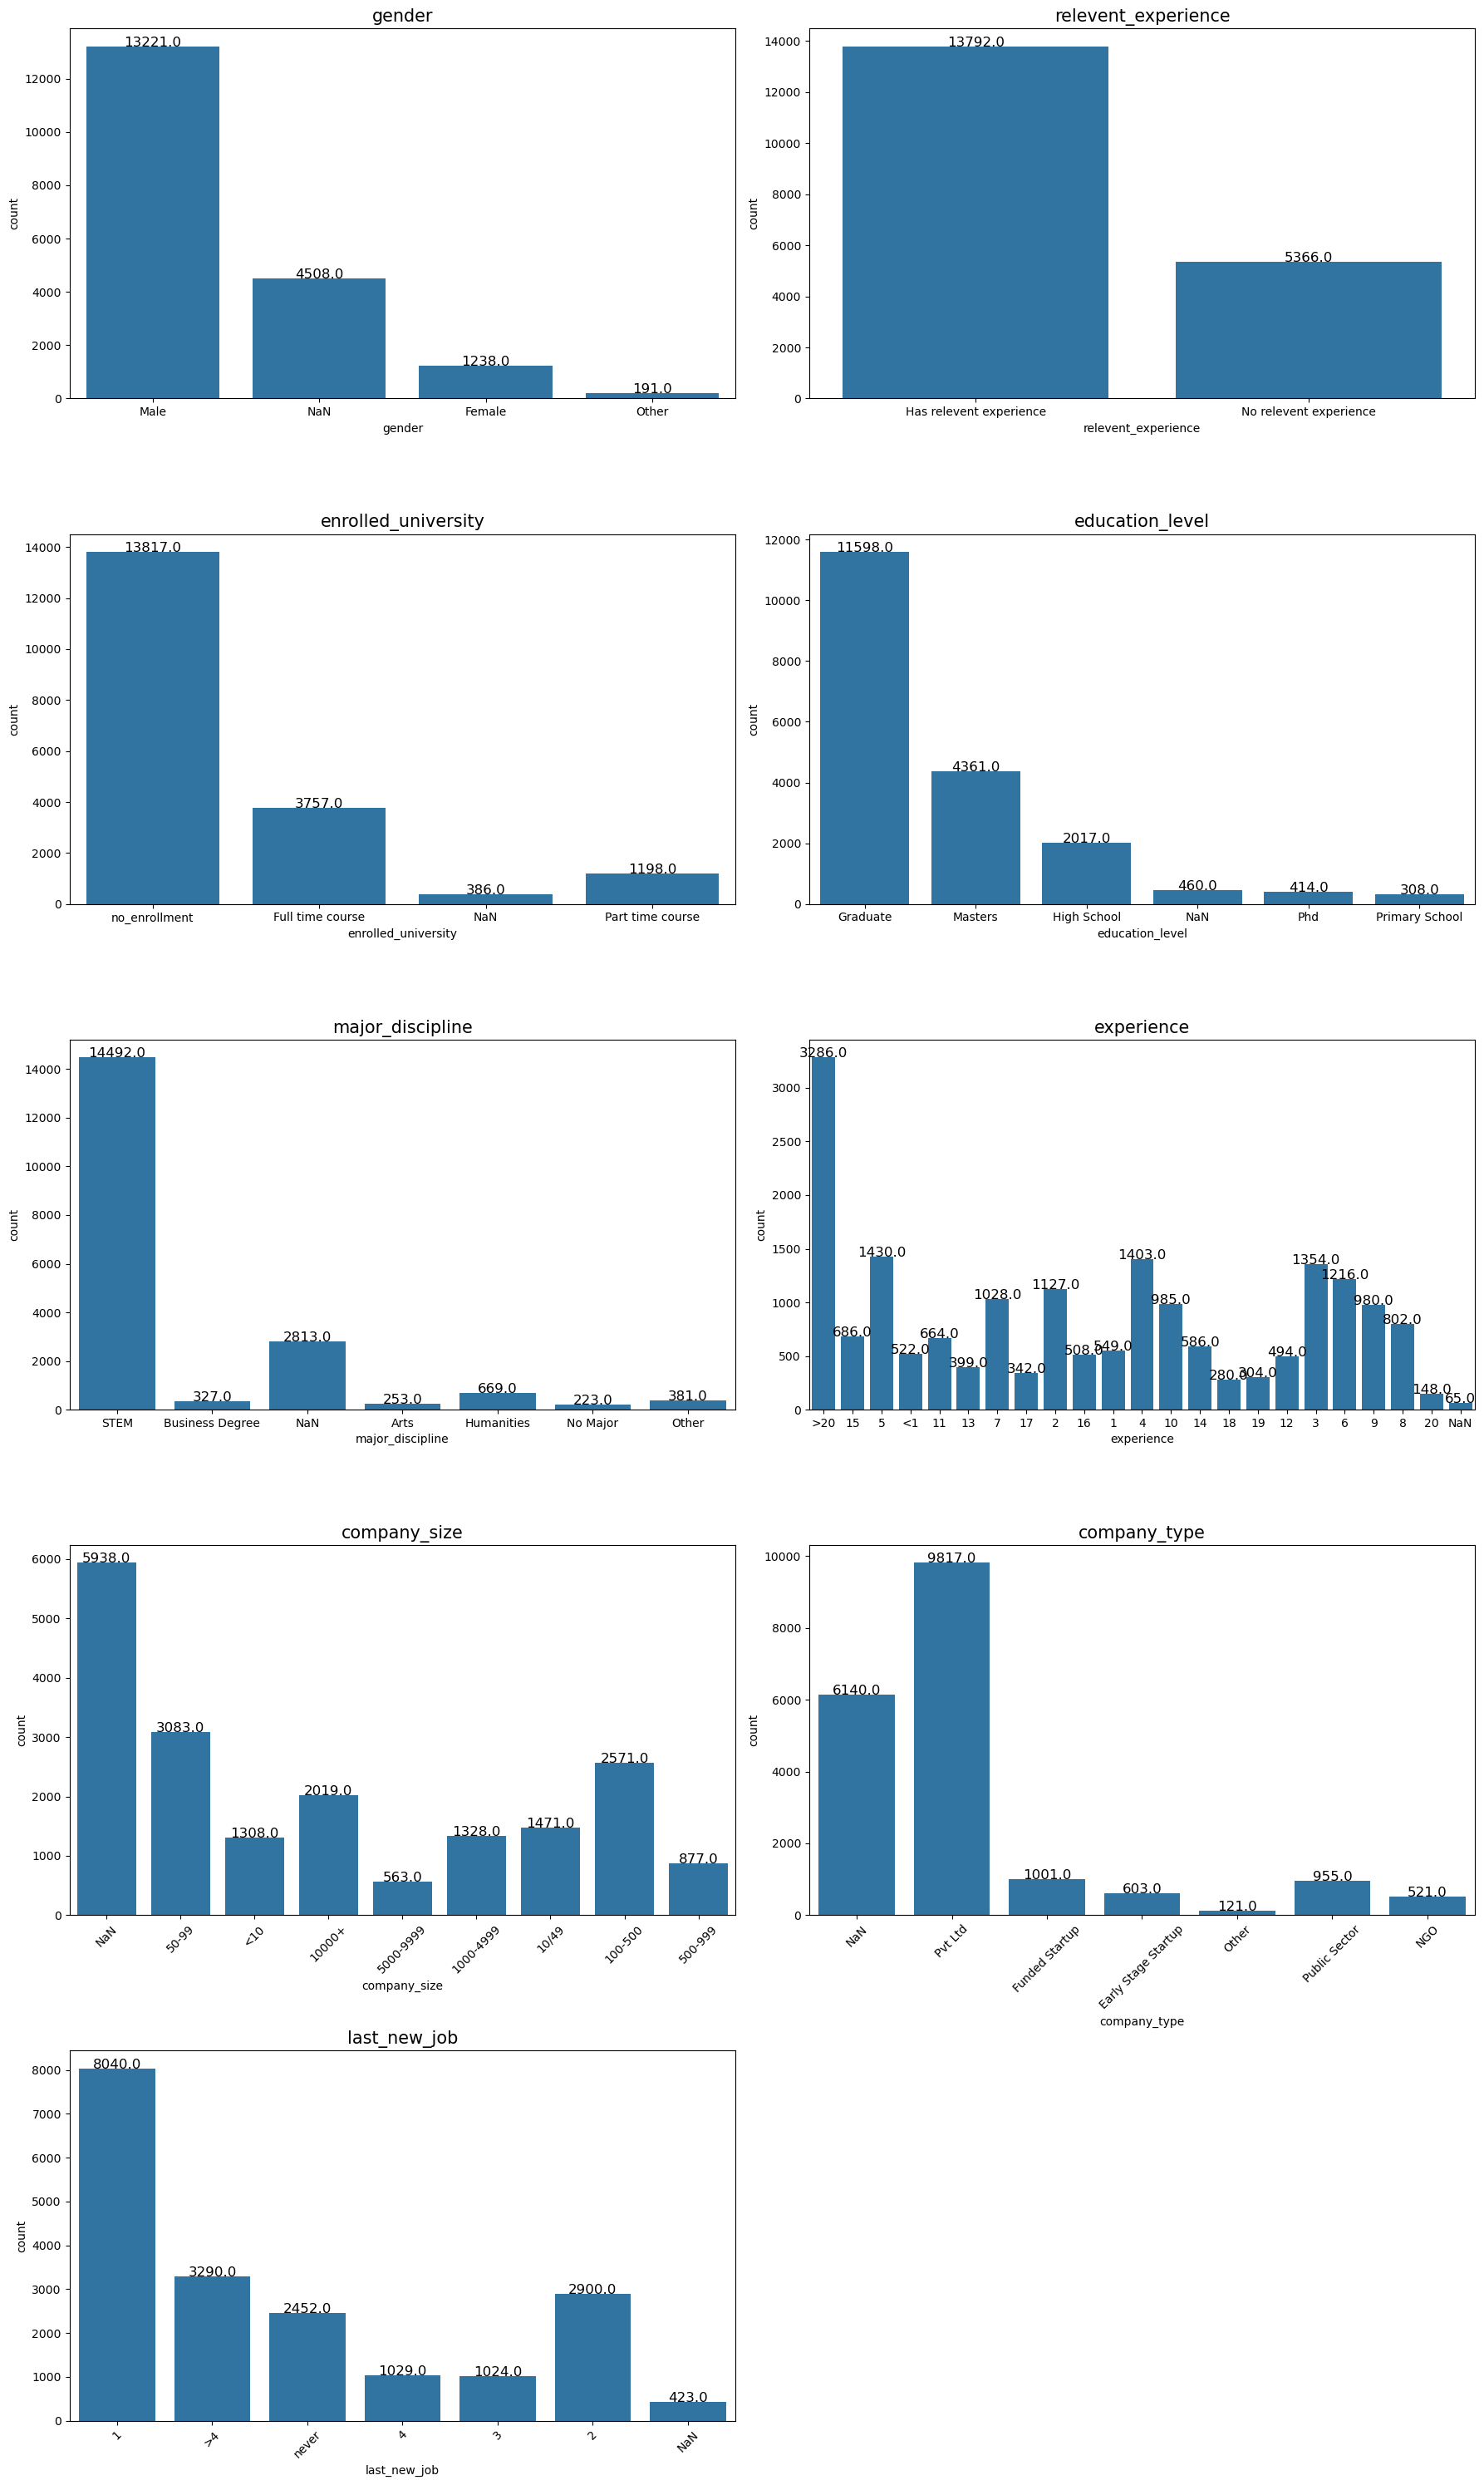

In [38]:
# Plot

# Tamanho da figura
plt.figure(figsize = (18,30))

# Lista de colunas
column_list = list(df.columns.values)[3:12]

# Contador
A = 0

# Loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

### Verificando a Distribuição das Variáveis Numéricas

In [43]:
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


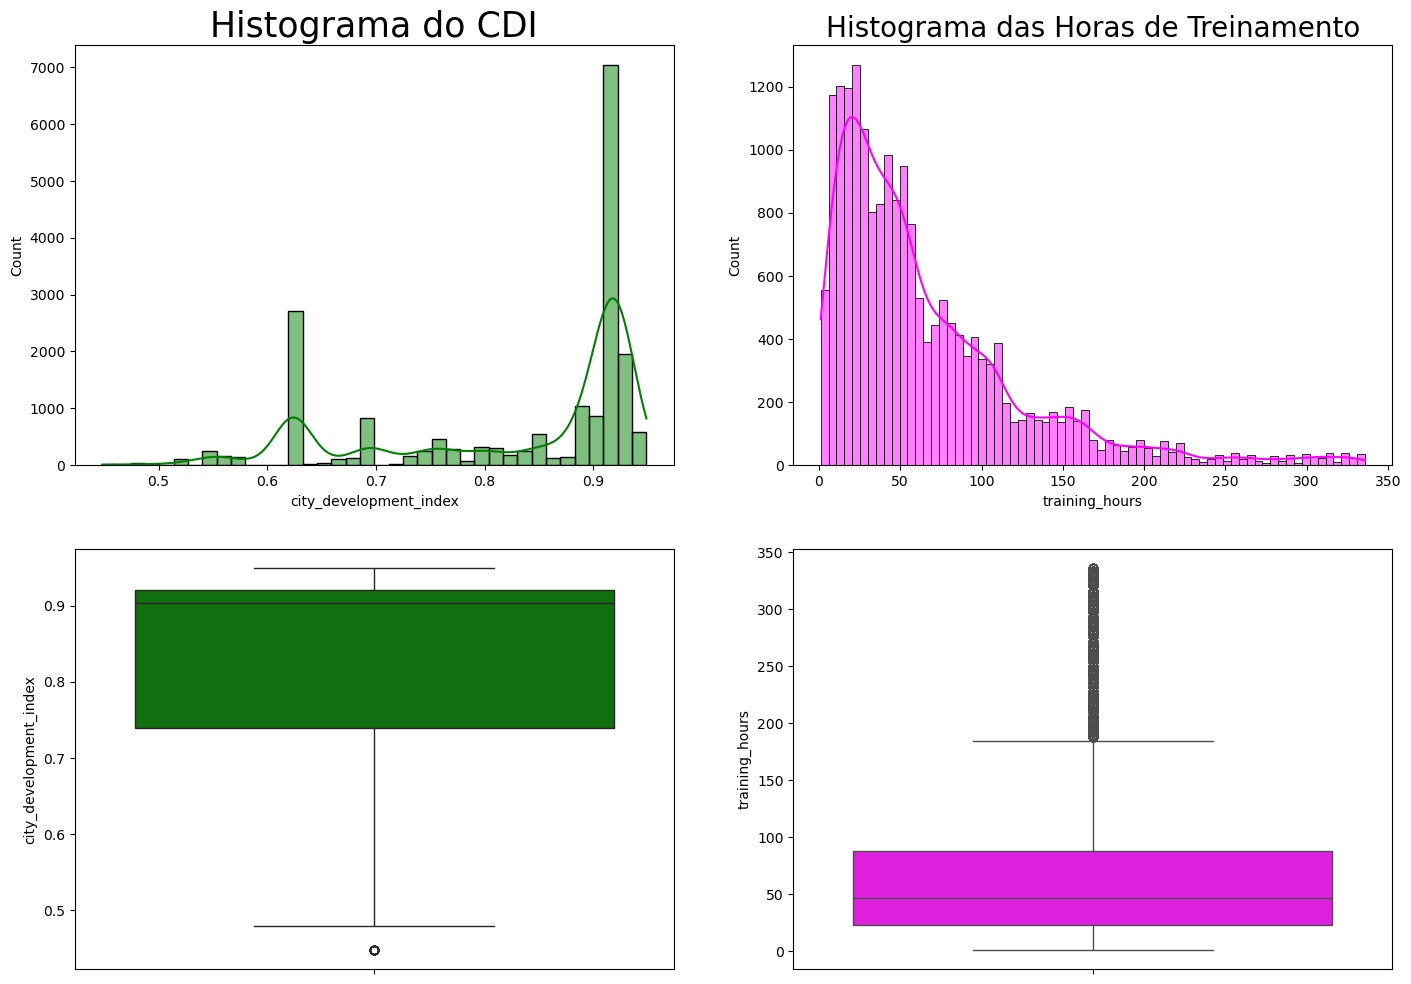

In [47]:
# Figura
plt.figure(figsize = (17,12)) # tamanho da figura

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'], kde = True, color = "green")
plt.title('Histograma do CDI', fontsize = 25)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color = "magenta")
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['city_development_index'], color = "green")

plt.subplot(224)
sns.boxplot(df['training_hours'], color = "magenta")

plt.show()

In [ ]:
Em Estatística, a distribuição normal é uma das distribuições de probabilidade mais utilizadas para modelar fenômenos naturais. Isso se deve ao fato de que um grande número de fenômenos naturais apresenta sua distribuição de probabilidade tão proximamente normal, que a ela pode ser com sucesso referida, e, portanto, com adequado acerto por ela representada como se normal fosse.

A distribuição normal, também conhecida como distribuição gaussiana, é uma curva simétrica em torno do seu ponto médio, apresentando assim seu famoso formato de sino.

Uma distribuição estatística é uma função que define uma curva, e a área sob essa curva determina a probabilidade de ocorrer o evento por ela correlacionado.

E o que é distribuição normal? É a mais importante dentre as distribuições estatísticas.

A curva de distribuição normal representa o comportamento de diversos processos nas empresas e muitos fenômenos comuns, como por exemplo, altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova.

A distribuição normal pode ser usada para aproximar distribuições discretas de probabilidade, como por exemplo a distribuição binomial. Além disso, a distribuição normal serve também como base para a inferência estatística clássica.

Nela, a média, mediana e moda dos dados possuem o mesmo valor.

![title](imagens/normal.png)

![title](imagens/boxplot.jpg)

In [62]:
# Teste de Normalidade da Distribuição

# Lista com as variáveis numéricas
numerical_feature = ['city_development_index', 'training_hours']

# Loop
for i in numerical_feature:
    
    # Calcula a normalidade
    stats, pval = normaltest(df[i])
    
     # Checar valor-p
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


As variáveis city_development_index e training_hours não seguem a distribuição normal. Para a análise numérica, usaremos o método não paramétrico.

Dados de training_hours estão localizados principalmente no lado esquerdo do histograma. É um comportamento esperado porque as pessoas geralmente ficam animadas ao fazer o treinamento no início, mas nem todos que começam conseguem terminar uma maratona. ;-)

### Correlação dos Dados

#### Correlação de Spearman Entre Variáveis Numéricas

Analisamos a correlação entre as variáveis numéricas e entre as variáveis numéricas e a variável alvo (o que estamos querendo analisar).

In [71]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [74]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [77]:
# Criamos uma cópia do dataframe original
df_numerical = df.copy()

In [80]:
df_numerical["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [87]:
# Convertemos a variável experience para numérica
df_numerical["experience"] = np.where(df_numerical["experience"] == "<1", 1, df_numerical["experience"])
df_numerical["experience"] = np.where(df_numerical["experience"] == ">20", 21, df_numerical["experience"])
df_numerical["experience"] = df_numerical["experience"].astype(float)

In [90]:
df_numerical["experience"].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64